# Polarimetric SAR Image Analysis with IPython and Docker

### Mort Canty (mort.canty@gmail.com)
### May 2016

## Introduction
The Docker container __mort/sardocker__  provides easy access to Python scripts for analysis of polarimetric synthetic aperture radar (polSAR) imagery. Some of these scripts are described in <a href="http://www.amazon.com/Analysis-Classification-Change-Detection-Sensing/dp/1466570377/ref=dp_ob_title_bk">Canty(2014), Image analysis, Classification and Change Detection in Remote Sensing, 3rd Revised Ed.</a> The change detection scripts are based upon the work of <a href="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6825">Conradsen et al (2016)</a>. In addition to scripts for polSAR speckle filtering, ENL estimation and change detection, the container encapsulates the command line interface of the <a href="https://www.asf.alaska.edu/data-tools/mapready/ ">ASF MapReady</a> software for terrain correction and geocoding of SAR images. The user interacts with the software in an IPython notebook served from within the Docker container.

## Software Installation
 1. <a href="https://docs.docker.com/installation/">Install Docker</a>
 2. In an X-terminal, run the command<br />
      __sudo docker run -d -p 433:8888 --name=sar -v *your_image_directory*:/home/imagery mort/sardocker__<br />
     where *your_image_directory* is the path to your SAR data. (For Windows or Mac OS. see the instructions for sharing volumes in the Docker documentation.) 
 3. Point your browser to<br /> 
    __localhost:433__
 4. Click on this tutorial, or open a new notebook with __New/Python 2__.


Here is a listing of the main directory __/home__ in the container. It contains the various Python and bash scripts required for preprocessing and change detection:

In [1]:
!ls -l /home

total 3552
-rw-rw-r--  1 root root   17575 May  6 08:07 dispms.py
-rw-rw-r--  1 root root    8308 Apr 25 12:24 enlml.py
-rw-rw-r--  1 root root    9470 Apr 30 07:58 gamma_filter.py
drwxrwxr-x 29 1000 1000    4096 Apr 27 13:32 imagery
-rw-rw-r--  1 root root    4967 Apr 25 12:26 ingest.py
-rw-------  1 root root     369 May  7 07:22 ipcontroller-client.json
-rwxr-xr-x  1 root root    8072 Apr 29 12:02 libprov_means.so
-rwxrw-r--  1 root root    2930 Dec 10 13:44 mapready.sh
-rw-rw-r--  1 root root   10623 Apr 25 12:26 omnibus.py
-rwxrw-r--  1 root root    1312 Apr 26 12:15 omnibus_rs2.sh
-rwxrw-r--  1 root root    1193 Apr 25 08:29 omnibus_s1.sh
-rw-rw-r--  1 root root     693 Oct 18  2015 prov_means.c
-rw-rw-r--  1 root root    1325 Apr 13 07:57 radarsat2quadpol.template
-rw-rw-r--  1 root root    9273 Apr 30 15:15 register.py
-rw-rw-r--  1 root root   13800 May  1 18:30 sar_seq.py
-rwxrw-r--  1 root root    1223 Apr 29 08:41 sar_seq_rs2.sh
-rwxrw-r--  1 root root     872 Apr 29 08:54 

The __/home/imagery__ directory contains the polarimetric SAR data and is shared with the host. In the present example there are 12 Radarsat-2 quadpol images in SLC (single-look complex) format along with a dem (digital elevation model). Acquistion times range from May 25, 2009 (20090525) to October 11, 2010 (20101011):

In [2]:
!ls -l /home/imagery | grep "_SLC$"

drwxrwxr-x 4 1000 1000      4096 Feb 17 14:41 RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC
drwxrwxr-x 4 1000 1000      4096 Feb 17 14:16 RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC
drwxrwxr-x 4 1000 1000      4096 Feb 17 14:17 RS2_OK5491_PK71074_DK68879_FQ21_20100520_172458_HH_VV_HV_VH_SLC
drwx------ 5 1000 1000      4096 Feb 13 09:24 RS2_OK5491_PK71074_DK68879_FQ21_20100707_172459_HH_VV_HV_VH_SLC
drwxrwxr-x 4 1000 1000      4096 Feb 17 14:19 RS2_OK5491_PK71074_DK68879_FQ21_20100731_172501_HH_VV_HV_VH_SLC
drwxrwxr-x 4 1000 1000      4096 Feb 17 14:20 RS2_OK5491_PK71074_DK68879_FQ21_20100824_172503_HH_VV_HV_VH_SLC
drwxrwxr-x 4 1000 1000      4096 Feb 17 14:21 RS2_OK5491_PK71074_DK68879_FQ21_20101011_172507_HH_VV_HV_VH_SLC
drwxrwxr-x 4 1000 1000      4096 Feb 17 14:22 RS2_OK5491_PK71075_DK68880_FQ21_20090618_172447_HH_VV_HV_VH_SLC
drwxrwxr-x 4 1000 1000      4096 Feb 17 14:24 RS2_OK5491_PK71077_DK68882_FQ21_20090805_172450_HH_VV_HV_VH_SLC
drwxrwxr-x

The images are level one SLC (single look complex format). For example, below are the contents of the image directory corresponding to acquistion date 20100426 (April 26, 2010). The four polarization combinations HH, HV,VH and VV are are stored as complex numbers in GeoTiff format:

In [3]:
ls -l /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC

total 336276
-rw-rw-r-- 1 1000 1000   741610 Apr 27  2010 BrowseImage.tif
-rw-rw-r-- 1 1000 1000    44218 Oct  2  2009 DFAIT_RS2 EULA_Single User License.pdf
-rw-rw-r-- 1 1000 1000      623 Aug 29  2013 GEARTH_POLY.kml
-rw-rw-r-- 1 1000 1000    89600 Apr 28  2010 Thumbs.db
-rw-rw-r-- 1 1000 1000 85731468 Apr 27  2010 imagery_HH.tif
-rw-rw-r-- 1 1000 1000 85731468 Apr 27  2010 imagery_HV.tif
-rw-rw-r-- 1 1000 1000 85731468 Apr 27  2010 imagery_VH.tif
-rw-rw-r-- 1 1000 1000 85731468 Apr 27  2010 imagery_VV.tif
-rw-rw-r-- 1 1000 1000    49475 Apr 27  2010 lutBeta.xml
-rw-rw-r-- 1 1000 1000    49475 Apr 27  2010 lutGamma.xml
-rw-rw-r-- 1 1000 1000    49475 Apr 27  2010 lutSigma.xml
drwxrwxr-x 3 1000 1000     4096 Feb 17 14:16 polsarpro/
-rw-rw-r-- 1 1000 1000   119099 Apr 27  2010 product.xml
-rw-rw-r-- 1 1000 1000   160314 Aug 29  2013 product_header.txt
-rw-rw-r-- 1 1000 1000    15152 Aug 29  2013 product_lut.bin
-rw-rw-r-- 1 1000 1000    49765 Aug 29  2013 product_lut.txt
-rw-rw-r-- 1 1

The subdirectory __polsarpro/T3__ contains the mult-looked polarimetric coherency matrix elements generated from the polarization combinations. This was done with the <a href="https://sentinel.esa.int/web/sentinel/toolboxes/sentinel-1">Sentinel-1 Toolbox</a> provided as freeware by the European Space Agency (ESA). (See the discussion below in the Section on the processing chain.) The image files are in ENVI format:

In [4]:
ls -l /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/polsarpro/T3

total 61476
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T11.bin
-rw-rw-r-- 1 1000 1000     245 Feb 17 15:07 T11.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T12_imag.bin
-rw-rw-r-- 1 1000 1000     246 Feb 17 14:42 T12_imag.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T12_real.bin
-rw-rw-r-- 1 1000 1000     241 Feb 17 14:42 T12_real.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T13_imag.bin
-rw-rw-r-- 1 1000 1000     246 Feb 17 14:42 T13_imag.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T13_real.bin
-rw-rw-r-- 1 1000 1000     241 Feb 17 14:42 T13_real.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T22.bin
-rw-rw-r-- 1 1000 1000     241 Feb 17 14:42 T22.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T23_imag.bin
-rw-rw-r-- 1 1000 1000     246 Feb 17 14:42 T23_imag.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T23_real.bin
-rw-rw-r-- 1 1000 1000     241 Feb 17 14:42 T23_real.bin.hdr
-rw-rw-r-- 1 1000 1000 6986432 Feb 17 14:42 T33.bin
-rw-rw-r-- 1

__We will return to these images shortly, but first a little theory:__

## Statistical Properties of polSAR Images


### Vector and matrix representations

A fully polarimetric SAR measures a
$2\times 2$ _scattering matrix_ $S$  at each resolution cell on the ground.
The scattering matrix relates the incident and the backscattered
electric fields $E^i$ and $E^b$ according to

$$
\pmatrix{E_h^b \cr E_v^b}
=\pmatrix{S_{hh} & S_{hv}\cr S_{vh} & S_{vv}}\pmatrix{E_h^i \cr E_v^i}.
$$

Here $E_h^{i(b)}$ and $E_v^{i(b)}$ denote the horizontal and vertical components of the incident (backscattered)
oscillating electric fields directly at the target. These can be deduced from the transmitted and received
radar signals via the so-called _far field_ approximations.
If both horizontally and vertically polarized radar pulses are
emitted and discriminated then they determine, from the above Equation, the four complex scattering matrix elements.
The per-pixel polarimetric information in the scattering matrix $S$, under the assumption
of reciprocity ($S_{hv} = S_{vh}$), can then be expressed as a three-component complex vector

$$
s = \pmatrix{S_{hh}\cr \sqrt{2}S_{hv}\cr S_{vv}},
$$


where the $\sqrt{2}$ ensures that the total intensity (received signal power) is consistent. It is essentially these vectors which are provided in the SLC level one data discussed above. The total intensity is referred to as the _span_ and is the complex inner product of the vector $s$,

$$
{\rm span} = s^\top s = |S_{hh}|^2 + 2|S_{hv}|^2 + |S_{vv}|^2.
$$

This is a real number and the corresponding gray-scale image is called the _span image_. The observation vector $s$ can be shown to be a realization of a complex multivariate normal random variable. An equivalent and often preferred representation is in terms of the *coherency vector*

$$
k = {1\over\sqrt{2}}\pmatrix{S_{hh} + S_{vv}\cr S_{hh} - S_{vv} \cr 2S_{hv}}.
$$

The polarimetric signal is  can also be represented by taking the complex outer product of $s$ with itself:

$$
C = s s^\top = \pmatrix{ |S_{hh}|^2 & \sqrt{2}S_{hh}S_{hv}^* & S_{hh}S_{vv}^* \cr
                                     \sqrt{2}S_{hv}S_{hh}^* & 2|S_{hv}|^2 & \sqrt{2}S_{hv}S_{vv}^* \cr
                                     S_{vv}S_{hh}^* & \sqrt{2}S_{vv}S_{hv}^* & |S_{vv}|^2 }.
$$

The diagonal elements of $C$ are real numbers, with span $= {\rm tr}(C)$, and the off-diagonal
elements are complex. This matrix representation contains all of the information in the polarized signal.



### Multi-looking

The matrix $C$ can be averaged over the number of looks (number of adjacent cells used to average out the effect of speckle) to give an estimate of the __covariance matrix__ of each multi-look pixel:

$$
\bar{C}  ={1\over m}\sum_{\nu=1}^m  s(\nu) s(\nu)^\top = \langle  s s^\top \rangle
 = \pmatrix{ \langle |S_{hh}|^2\rangle & \langle\sqrt{2}S_{hh}S_{hv}^*\rangle & \langle S_{hh}S_{vv}^*\rangle \cr
\langle\sqrt{2} S_{hv}S_{hh}^*\rangle & \langle 2|S_{hv}|^2\rangle & \langle\sqrt{2}S_{hv}S_{vv}^*\rangle \cr
\langle S_{vv}S_{hh}^*\rangle & \langle\sqrt{2}S_{vv}S_{hv}^*\rangle & \langle |S_{vv}|^2\rangle },
$$

where $m$ is the number of looks. This matrix (or alternatively the equivalent __coherency matrix__ $\langle  k k^\top \rangle$) is generated with the Sentinel-1 Toolbox and stored in the subdirectory __polsarpto/T3__ which we listed in a cell above.  Rewriting the first of the above equalities,

$$
m\bar{C} = \sum_{\nu=1}^m  s(\nu) s(\nu)^\top =:  x.
$$

This quantity $x$ is a realization of a __complex random matrix__ which is known to have
a complex Wishart distribution with $N\times N$ covariance matrix $\Sigma$ (here $N=3$) and $m$ degrees of freedom:

$$
p_{W_c}( x) ={|x|^{(m-N)}\exp(-{\rm tr}(\Sigma^{-1} x)) \over
\pi^{N(N-1)/2}|\Sigma|^{m}\prod_{i=1}^N\Gamma(m+1-i)},\quad m \ge N,
$$

provided that the vectors $s(\nu)$ are independent and drawn from a complex multivariate normal distribution.

### Dual and single polarimetric imagery

The scattering vector given above corresponds to so-called full, or _quad polarimetric_ SAR.
Satellite-based SAR sensors often operate in reduced, power-saving polarization modes, emitting only one polarization and receiving
two (dual polarization) or one (single polarization). The look-averaged covariance matrices are reduced in dimension
correspondingly. For instance for dual polarization with horizontal transmission and horizontal and vertical reception,

$$
\bar{C} = \pmatrix{ \langle |S_{hh}|^2\rangle & \langle S_{hh}S_{hv}^*\rangle \cr
\langle S_{hv}S_{hh}^*\rangle & \langle |S_{hv}|^2\rangle },
$$

and, for single polarization and horizontal transmission/reception, we get simply the intensity image

$$
\bar{I} = \langle |S_{hh}|^2\rangle \quad {\rm or} \quad \bar{I} = \langle |S_{vv}|^2\rangle.
$$

### Equivalent number of looks

When multi-look averaging takes place, the observation vectors $s(\nu)$ are not completely independent; they will generally be correlated somewhat.
In order to account for this, the complex Wishart distribution is often parameterized with ENL (rather than $m$) degrees of freedom, where ENL is the so-called  __equivalent number of looks__. This quantity can be estimated from the image itself.

Returning to the Radarsat-2 image acquired April 26, 2010, we will geocode it with MapReady and then try to determine the equivalent number of looks.. The bash script /home/mapready.sh takes two arguments, the acquisition date in the format yyymmdd and the sensor (presently rs2quad or tsxdual):

In [6]:
!./mapready.sh 20100426 rs2quad

Geocoding polSARpro multilook polarimetric matrix image with mapready ...
dos2unix: converting file /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC/polsarpro/T3/config.txt to Unix format ...
Original SLC image dimensions:      rows 5539  cols 3788
After multi-looking with polSARpro: rows 1384  cols 1262
Azimuth looks: 4
Range looks:   3
***** processing polSARpro polarimetric matrix image:
***** /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC
***** ...
***** Done, see mapready.log
***** Combining into a single image file ...
Overwriting previous combined image
     Ingest SAR
Tue Mar 29 10:26:42 2016
Directory /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/
writing band 1
writing band 2
writing band 3
writing band 4
writing band 5
writing band 6
writing band 7
writing band 8
writing band 9
elapsed time: 8.49227190018
Multiband image is /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_201

We see that the multi-look images were  created with the Sentinel-1 Toolbox with $4\times 3 = 12$ looks.
This corresponds to a square pixel size of close to $20.5\times 20.5$ meters. The deoreferenced coherency matrix image at this resolution is stored in a single 9-bamnd image geotiff format.

Before we can display the image, we have to enable Matplotlib functionality within the notebook with the so-called *magic* command

In [4]:
%matplotlib inline

We will use the Python script __/home/dispms.py__ for displaying. Here is the help:

In [5]:
run dispms -h

Usage: python dispms.py [-h] [-k] [-c][-C Classes] 

            [-l] [-L] [-o alpha] 

            [-e enhancementf] [-E enhancementF]

            [-p posf] [P posF [-d dimsf] [-D dimsF]

            [-f filename1] [-F filename2] 

                                        
            if -f is not specified it will be queried

            use -c  -C  for classification image
 
            use -k to generate a PNG of filename1 and associated KLM file to overlay (approximately) on Google Earth

            use -o alpha to overlay right onto left image with transparency alpha

            RGB bandPositions and spatialDimensions are lists, e.g., -p [1,4,3] -d [0,0,400,400] 

            enhancements: 1=linear255 2=linear 3=linear2pc 4=equalization 5=logarithmic



The command below will generate a $1000\times 1000$ pixel RGB color composite of the three diagonal elements:

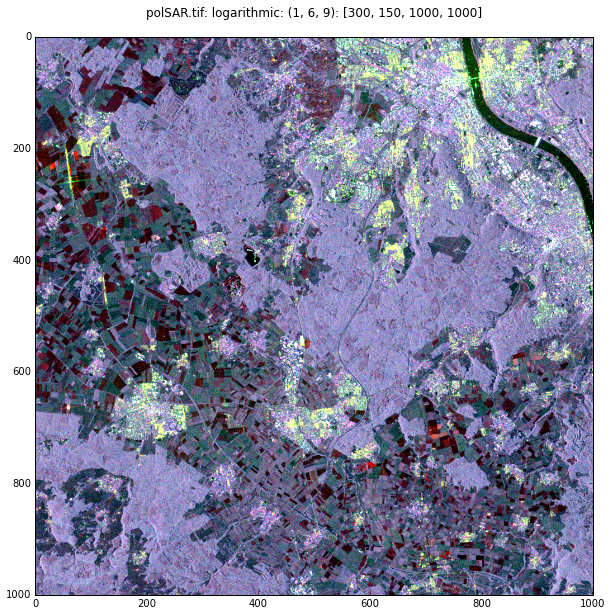

In [10]:
run /home/dispms -p [1,6,9] -d [300,150,1000,1000] \
-f /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif

The scene above was acquired over the city of Bonn, Germany (upper right hand corner with the Rhine river). The blueish, featurless areas are mixed forest (in this coherency decomposition, volume scattering), the green-yellow areas are built-up (double-bounce) and the redish fields are single-bounce. 

To check the number of looks, We will run the __/home/enlml.py__ script on a spatial subset which includes a lot forested land cover. This script is mased on an multivariate estimation method due to <a href="http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=5071293&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F36%2F5291960%2F05071293.pdf%3Farnumber%3D5071293">Anfinsen et al. (2009)</a>.

The spatial subset is entered with the -d flag as in the __/home/dispms__ script.
Here we choose -d [800,400,500,500]:

     ENL Estimation
Sat May  7 07:44:35 2016
infile:  /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif
Quad polarimetry
filtering...
row:  100  200  300  400 

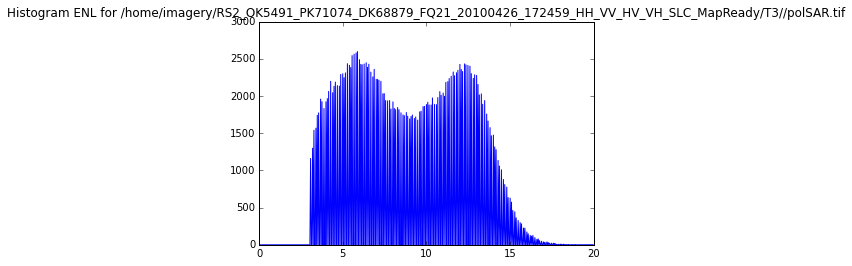

 ENL image written to: /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_enl.tif
elapsed time: 57.3923888206


In [11]:
run enlml -d [800,400,500,500] \
/home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3//polSAR.tif

There are two modes (maxima) at about 6 and 12 looks. Here is the ENL image

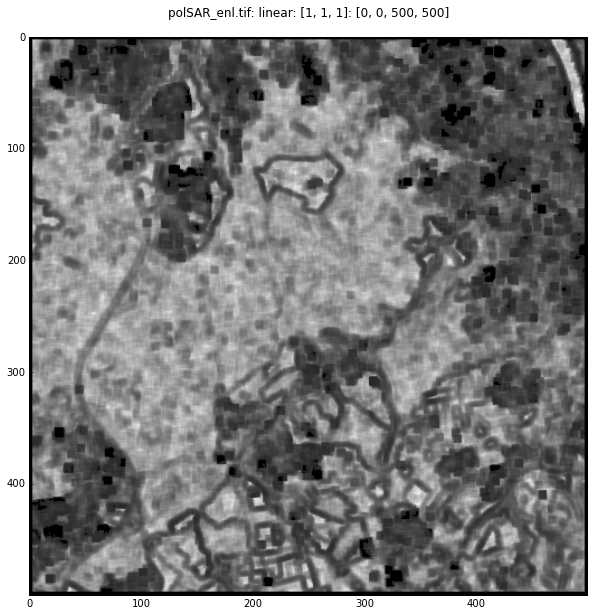

In [12]:
run dispms -e 2 -f \
/home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_enl.tif

The speckle statistics are most well-developed in the homogeneous forested areas (bright pixels) corresponding to the mode at ENL=12, so this value will be adopted in the sequel.

## Speckle Filtering (The gamma-MAP filter)

Let us represent the $m$ look-averaged SAR intensity image by the random variable $G$ 
with mean $\langle G\rangle=x$, where $x$ is  the underlying signal. Then  ${\rm var}(G) = x^2/m$
and $G$ is gamma-distributed with density function

$$
p(g\mid x) = {1\over (x/m)^m\Gamma(m)}g^{m-1}e^{-gm/x}.
$$

Let $G=xV$. Then it follows that $V$ has the density

$$
p(v) = {m^m\over\Gamma(m)}v^{m-1}e^{-vm}.
$$

Therefore, in terms of the observed pixel intensities $g$ (realizations of $G$), we can write

$$
g = x v,
$$

where v is distributed as above, and has mean 1 and variance $1/m$.

Because of this special _multiplicative noise_ nature of speckle, conventional smoothing filters  are not particularly suitable as an aid to SAR image interpretation.

The _gamma maximum a posteriori_ (gamma MAP) de-speckling filter
may be derived from Bayes' Theorem. The _a posteriori_
conditional probability for $x$, given intensity measurement $g$ is

$$
{\rm pr}(x\mid g) = { p(g\mid x){\rm pr}(x)\over p(g) },
$$

where $p(g\mid x)$ is given above, ${\rm pr}(x)$ is the prior probability for $x$
and $p(g)$ is the total probability density for $g$. This formulation allows us to include
prior knowledge of the signal statistics (or texture) if available. An empirical statistical model for $x$
is suggested by measurements of backscatter from ocean waves, namely

$$
{\rm pr}(x) \sim \left({\alpha\over\mu}\right)^\alpha {x^{\alpha-1}\over\Gamma(\alpha)}e^{-\alpha x/\mu}.
$$

This is just the gamma probability density with $\beta=\mu/\alpha$, and hence with mean $\alpha\beta= \mu$
and variance

$$
{\rm var}(x) = \alpha\beta^2 = \mu^2/\alpha.
$$

The parameters $\mu$ and $\alpha$ can be
estimated as follows. By passing an $n\times n$ window over the image we can obtain $\bar g = \langle g\rangle$ and ${\rm var}(g)$. Then
the estimates are

$$
\hat\mu = \bar g,
$$

and
$$
\hat\alpha = {\hat\mu^2\over {\rm var}(x)} = {\bar g^2\over {\rm var}(x)} ={1 + 1/m \over {{\rm var}(g)/\bar g^2 - 1/ m}}.
$$

Hence the posterior probability for $x$ given measurement $g$ is

$$
{\rm pr}(x\mid g) \sim {1\over (x/m)^m\Gamma(m)}g^{m-1}e^{-gm/x}\left({\alpha\over\mu}\right)^\alpha {x^{\alpha-1}\over\Gamma(\alpha)}e^{-\alpha x/\mu} =: L
$$

Taking the logarithm,

$$
\log L =\  m\log m -m\log x +(m-1)\log g - \log\Gamma(m)- mg/x
 +\alpha\log\alpha - \alpha\log\mu + (\alpha-1)\log x - \log\Gamma(\alpha) -\alpha x/\mu.
$$

We now get the maximum a posteriori (MAP) value for $x$ given the observed pixel intensity $g$ by maximizing $\log L$ with respect
to $x$:

$$
{d\over dx}\log L = -m/x + mg/ x^2 + (\alpha-1)/x - \alpha/\mu = 0.
$$

This leads to a quadratic equation for the most probable signal intensity $x$,

$$
{\alpha\over\mu}x^2 + (m+1-\alpha)x - mg = 0,
$$

where the parameters $\mu$ and $\alpha$ are estimated locally.
Note that in homogeneous regions where $m\approx \bar g^2/{\rm var}(g)$, $\hat\alpha\to\infty$. In that case $x\approx \hat\mu = \bar g$.

The gamma MAP filter is not appropriate to the complex off-diagonal matrix elements 
as their {\it a priori} statistics are not well understood.


We will illustrate the Gamma-MAP speckle filter on the April 26 image.
The Python script __gamma_filter.py__ takes as input a polSAR image in covariance or coherency matrix form and
filters the diagonal elements only:

In [13]:
run gamma_filter -h


    Usage:
    ------------------------------------------------
    python gamma_filter.py [-h] [-d dims] filename enl
    
    Run a gamma MAP filter in the diagonal elements of a C or T matrix
    ------------------------------------------------


Because of the use of $7\times 7$ directional filters to preserve detail, the the script is rather slow, and will attempt to parallel execution on IPython engines if available. On a multi-core processor IPython engines can be initiated with a Jupyter terminal command, e.g.,

__ipcluster start -n 4__

In [16]:
run gamma_filter -d [300,150,1000,1000] \
/home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif 12

    GAMMA MAP FILTER
Sat May  7 08:03:21 2016
infile:  /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif
equivalent number of looks: 12.000000
Attempting parallel computation ...
available engines: [0, 1, 2, 3]
filtering 3 diagonal matrix element bands ...
result written to: /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_gamma.tif
elapsed time: 344.401278019


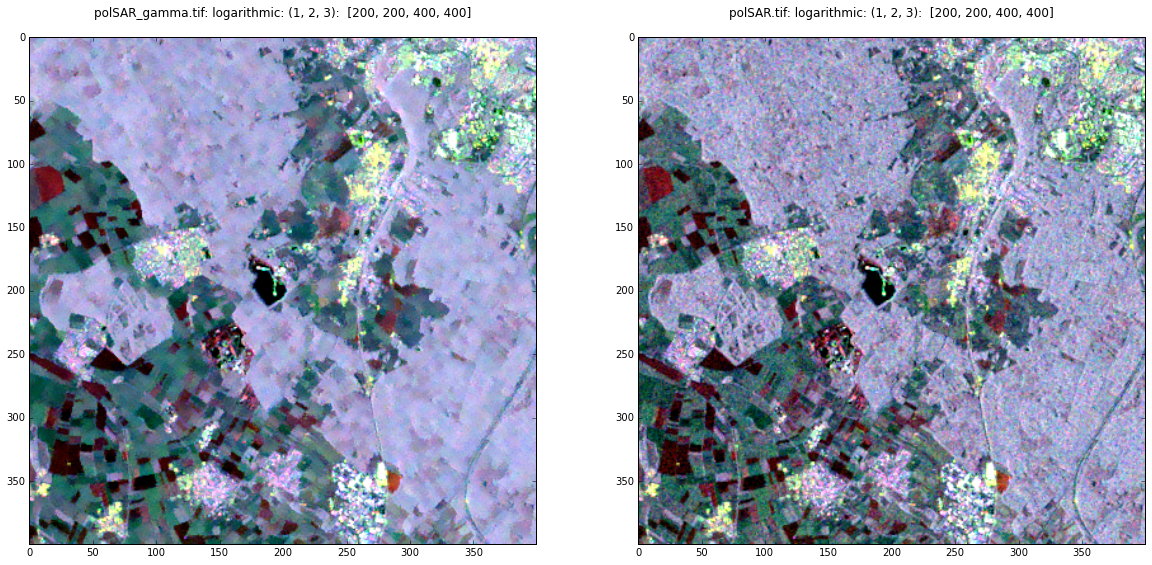

In [21]:
run /home/dispms -p [1,2,3] -d [200,200,400,400] -P [1,6,9] -D [500,350,400,400] \
-f /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_gamma.tif \
-F /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20100426_172459_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif 

Note the good preservation of detailed structure.

It should be noted that this kind of adaptive filter is not an acceptable pre-processing step for change detection, since the equivalent number of looks after filtering is no-longer a characteristic of the entire scene.

## Change Detection

### Bitemporal data

The following is discussion is based on <a href="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=1219">Conradsen et al (2003)</a>.

As we have seen, we can represent a pixel vector in an $m$ look-averaged
polSAR image in covariance matrix format by $\bar C$, where

$$
m\bar C =  x = \sum_{\nu=1}^m  s(\nu) s(\nu)^\top
$$

is a realization of a random matrix $X$ with a complex Wishart distribution.

In order to derive a change detection procedure for two polarimetric SAR images, we formulate a statistical test. For each pixel in the two image, define the null (or no-change) simple  hypothesis as

$$
H_0:\quad \Sigma_1 = \Sigma_2 = \Sigma,
$$

and the alternative composite hypothesis as

$$
H_1:\quad \Sigma_1 \ne \Sigma_2.
$$

Under $H_0$ the __maximum likelihood__ for $\Sigma$ can be shown to be given by

$$
L(\hat\Sigma) = { |x_1|^{m-3}|x_2|^{m-3}\exp(-2m\cdot{\rm tr}(I)) \over \left({1\over 2m}\right)^{3\cdot 2m}| x_1+ x_2|^{2m}\Gamma_3(m)^2 },
$$

where $I$ is the $3\times 3$ identity matrix and ${\rm tr}(I)=3$.
Under $H_1$ the maximum likelihood for $\Sigma_1$ and  $\Sigma_2$ is

$$
L(\hat\Sigma_1,\hat\Sigma_2) = { |x_1|^{m-3}|x_2|^{m-3}\exp(-2m\cdot{\rm tr}(I)) \over \left({1\over m}\right)^{3m}\left({1\over m}\right)^{3m} |x_1|^m |x_2|^m\Gamma_3(m)^2 }
$$

Then the __likelihood ratio test__ has the critical region for rejection of the no-change hypothesis

$$
Q = {L(\hat\Sigma) \over L(\hat\Sigma_1,\hat\Sigma_2) } = 2^{6m}{ |x_1|^m |x_2|^m \over |x_1 + x_2|^{2m} } \le k.
$$

Finally, one can derive (<a href="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=1219">Conradsen et al (2003)</a>) the following approximation for the statistical distribution of the test statistic $Q$:

$$
{\rm prob}(-2\rho\log Q\le z) \simeq P_{\chi^2;N^2}(z) + \omega_2\left[ P_{\chi^2;N^2+4}(z) - P_{\chi^2;N^2}(z) \right],
$$

where $P_{\chi^2;m}(z)$ is the chi square distribution wth m degrees of freedom,
$$
\rho = 1 - {2N^2-1\over 6N}\cdot{3\over 2 m}, 
$$

and

$$
\omega_2 = - {N^2\over 4}\cdot\left(1-{1\over \rho}\right)^2 + {N^2(N^2-1)\over 24 \rho^2}\cdot{7\over 4m^2}.
$$

In practice we choose a significance level $\alpha$, e.g., $\alpha = 0.01$, and decision threshold $z$ such that

$$
{\rm prob}(-2\rho\log Q\le z) = 1-\alpha
$$

and interpret all pixels with larger values of $-2\rho\log Q$ as change.

### Multitemporal data

The preceding discussion generalizes in a straightforward way to a time series of $k$ images (<a href="http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6825">Conradsen et al (2016)</a>). In the equation for the test statistic $Q$ above, the numerator consists of a product $k$ determinants $|x_1|\cdot|x_2|\cdot\dots|x_k|$ and the denominator similarly the determinant of the sum of the $k$ observations $|x_1+x_2+\dots x_k|$. The multitemporal test is referred to as the __omnibus test__ will in general be more powerful (have a higher detection probability) for the same significance level than a bitemporal test just involving the first and last images. Furthermore, the test statistic can be factored into a product of test statistics that can be used to ascertain the time or times at which significant changes occur in the series.

## A Processing Chain

The change detection method implies the following processing sequence in order to generate a change map from a time series of
polarimetric SAR images provided at the single look complex (SLC) processing level:

1. First of all the multi-look polarimetric SAR images in covariance or coherency matrix format are generated from from the <a href="https://sentinel.esa.int/web/sentinel/toolboxes/sentinel-1">Sentinel 1 Toolbox</a> available from the European Space agency. Presently this must be done outside of the Docker container (and IPython). Geocoding and terrain correction can optionally be applied within the Sentinel toolbox, or deferred to the next step. The coherenecy matrix has the same eigenvalues and hence the same determinant as the covariance matrix, so that the hypothesis test described above can be applied unchanged to either format. The rest of the processing takes place in the IPython notebook.

2. The matrix images can then be processed by MapReady for georeferencing and terrain correction if this has not yet been carried out (see above). The bash script __/home/mapready.sh__ automates the procedure. MapReady will output the geocoded covariance/coherency matrix image in the form of co-registered GeoTiff files, one for each diagonal matrix element and two (real and imaginary parts) for each off-diagonal component. A python script __/home/ingest.py__ is called automatically to combine these files to a single, multi-band image in floating point format. 

3. The ENL (equivalent number of looks) can (optionally) be estimated with the script __enlml.py__. A multivariate estimator is used to accomplish this as described by <a href="http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=5071293&url=http%3A%2F%2Fieeexplore.ieee.org%2Fiel5%2F36%2F5291960%2F05071293.pdf%3Farnumber%3D5071293">Anfinsen et al. (2009)</a>.

4. The non-sequential multitemporal change detection algorithm for the Radarst-2 images is invoked with the bash script __/home/omnibus_rs2.sh__. This script calls the Python programs __/home/register.py__ to co-register the sequence of $k$ images to the first in the series and then __/home/omnibus.py__ to perform the pixel-wise hypothesis tests. The test statistics $-2\rho\log Q$ and change probabilities ${\rm prob}(-2\rho\log Q\le z)$ are written to a two-band GeoTiff file. Additionally a change map showing changes at significance level 0.01 in red overlayed onto the span image is writen to a three-band (RGB) GeoTiff file. The sequential algorithm is run by the bash script __/home/sar_seq_rs2.sh__ which calls the routines __/home/register.py__ and __/home/sar_seq.py__. At present it generates four change image files: three -single-band images showing, per-pixel, the the period in which the first change occured (smap), the last change occurrence (cmap), and the change frequency (fmap) and a $k-1$-band file showing where changes occured in each of the $k-1$ intervals.

## Change detection with Radarsat-2 Quadpol Images

We can illustrate with the sequential algorithm applied to all 11 Radarsat-2 images:

In [22]:
!/home/sar_seq_rs2.sh 20090525 20090618 20090712 20090805 20090829 20091016 \
                  20100426 20100520 20100707 20100824 20101011 [300,150,1000,1000] 12 0.01

***** Multitemporal PolSAR Change Detection **********
***** Radarsat2 quad or dualpol imagery **************
***** Pre-processed with MapReady ********************
******************************************************
number of images    11
ENL                 12
spatial subset      [300,150,1000,1000]
significance level  0.01
     Multi-temporal SAR Change Detection
Sat May  7 08:28:14 2016
Spatial/spectral subsetting
Sat May  7 08:28:14 2016
Input /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC_MapReady/T3/polSAR.tif
elapsed time: 1.49042081833
 
Attempting parallel execution of co-registration ...
available engines [0, 1, 2, 3]
elapsed time for co-registration: 243.870372057
 
First (reference) filename:  /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_sub.tif
number of images: 11
equivalent number of looks: 12.000000
significance level: 0.010000
pre-calculating R and p-values ...
R(l=1,j=2)  R(l=1,j=3)

Here is a subset of the change map showing the time of the first change:

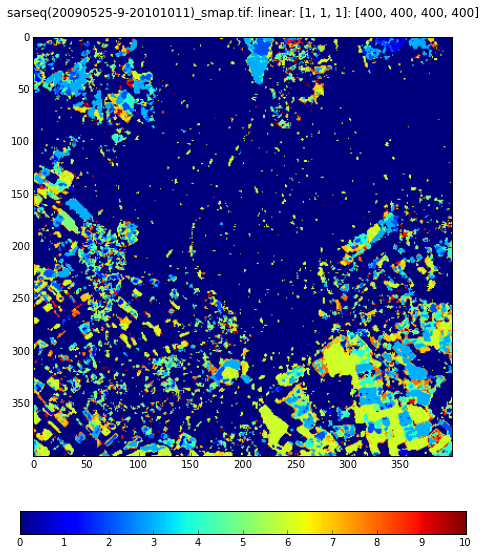

In [33]:
run /home/dispms  -c -d [400,400,400,400] \
-f /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC_MapReady/T3/sarseq(20090525-9-20101011)_smap.tif

Here is the frequency of change map overlayed onto the 20090525 image, showing a "hotspot" at the moving dredges in the flooded sand quarry:

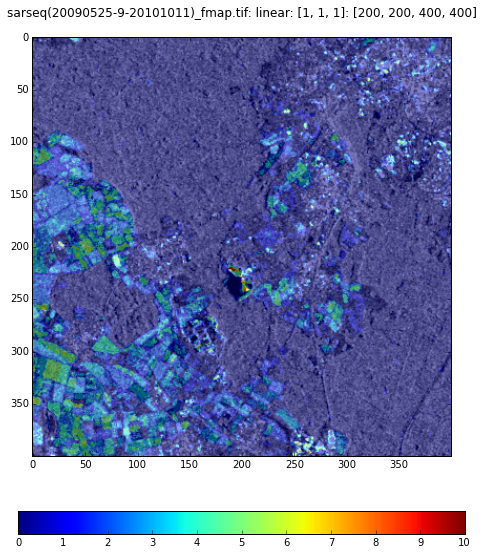

In [30]:
run /home/dispms  -c -d [200,200,400,400] \
-f /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC_MapReady/T3/sarseq(20090525-9-20101011)_fmap.tif \
-D [200,200,400,400] -o 0.5 \
-F  /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_sub.tif

There are several "hotspots" in the urban area of Bonn. The one along the Rhine (upper middle, near the central Kennedy bridge) corresponds to the docking of excusion boats.

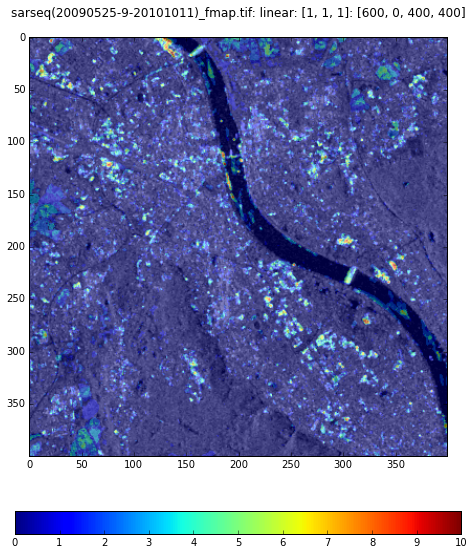

In [31]:
run /home/dispms  -c -d [600,0,400,400] \
-f /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC_MapReady/T3/sarseq(20090525-9-20101011)_fmap.tif \
-D [600,0,400,400] -o 0.5 \
-F  /home/imagery/RS2_OK5491_PK71074_DK68879_FQ21_20090525_172447_HH_VV_HV_VH_SLC_MapReady/T3/polSAR_sub.tif